<a href="https://colab.research.google.com/github/Itz-DarkJos/Importe_Datos/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Concatenar todas las tiendas
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


In [3]:
ingresos_tiendas = [tienda, tienda2, tienda3, tienda4]
for i, t in enumerate(ingresos_tiendas, 1):
    total = (t['Precio'] + t['Costo de envío']).sum()
    print(f'Ingreso total de tienda{i}: {total:,.2f}')


Ingreso total de tienda1: 1,212,258,300.00
Ingreso total de tienda2: 1,175,828,600.00
Ingreso total de tienda3: 1,156,536,200.00
Ingreso total de tienda4: 1,093,693,100.00


# 2. Ventas por categoría

In [4]:
ventas_categoria = df['Categoría del Producto'].value_counts()
print(ventas_categoria)


Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: count, dtype: int64


# 3. Calificación promedio de la tienda


In [5]:
for i, t in enumerate(ingresos_tiendas, 1):
    media = t['Calificación'].mean()
    print(f'Calificacion media de tienda{i}: {media:.2f}')


Calificacion media de tienda1: 3.98
Calificacion media de tienda2: 4.04
Calificacion media de tienda3: 4.05
Calificacion media de tienda4: 4.00


# 4. Productos más y menos vendidos

In [6]:
productos_vendidos = df['Producto'].value_counts()

producto_mas_vendido = productos_vendidos.idxmax()
producto_menos_vendido = productos_vendidos.idxmin()

print(f'Producto más vendido: {producto_mas_vendido}')
print(f'Producto menos vendido: {producto_menos_vendido}')


Producto más vendido: Mesa de noche
Producto menos vendido: Celular ABXY


# 5. Envío promedio por tienda

In [7]:
for i, t in enumerate(ingresos_tiendas, 1):
    promedio = (t['Precio'] + t['Costo de envío']).mean()
    print(f'Valor promedio por venta en tienda{i}: {promedio:,.2f}')


Valor promedio por venta en tienda1: 513,886.52
Valor promedio por venta en tienda2: 498,443.66
Valor promedio por venta en tienda3: 490,265.45
Valor promedio por venta en tienda4: 463,822.35


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-16-684372009.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], y=ingresos, palette="Blues_d")


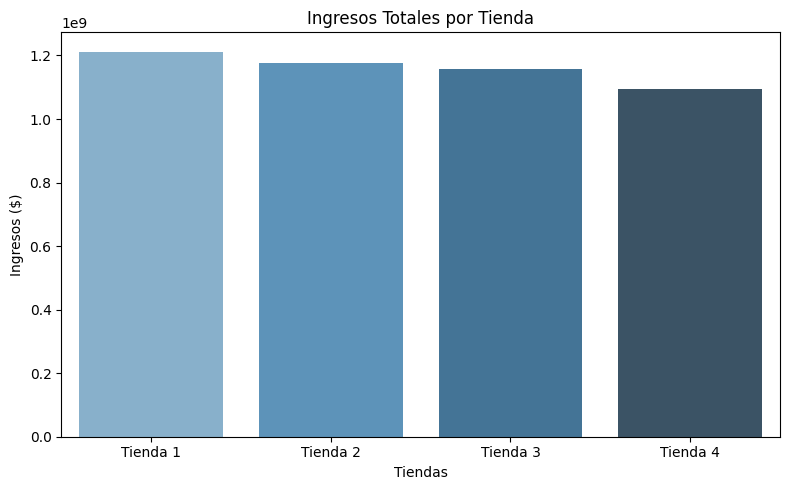

In [16]:
ingresos = [
    (tienda['Precio'] + tienda['Costo de envío']).sum(),
    (tienda2['Precio'] + tienda2['Costo de envío']).sum(),
    (tienda3['Precio'] + tienda3['Costo de envío']).sum(),
    (tienda4['Precio'] + tienda4['Costo de envío']).sum()
]

plt.figure(figsize=(8, 5))
sns.barplot(x=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], y=ingresos, palette="Blues_d")
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos ($)")
plt.xlabel("Tiendas")
plt.tight_layout()
plt.show()


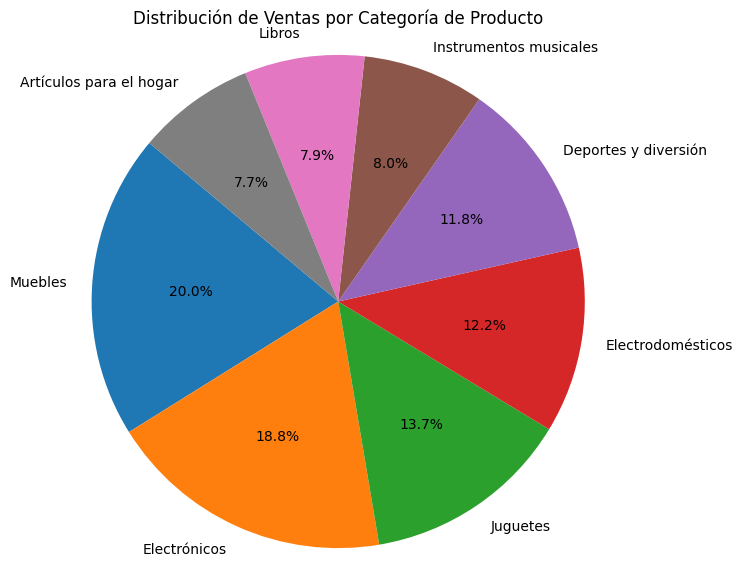

In [10]:
categorias = df['Categoría del Producto'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Ventas por Categoría de Producto")
plt.axis('equal')  # Círculo perfecto
plt.show()


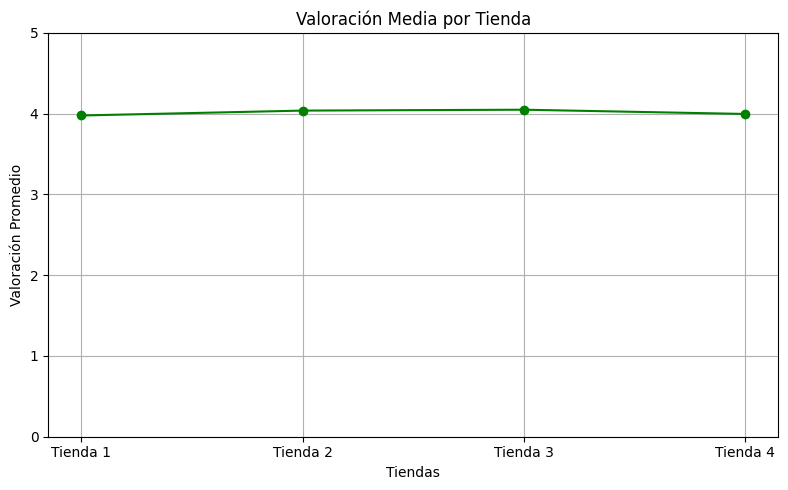

In [11]:
valoraciones = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

plt.figure(figsize=(8, 5))
plt.plot(["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], valoraciones, marker='o', linestyle='-', color='green')
plt.title("Valoración Media por Tienda")
plt.ylabel("Valoración Promedio")
plt.xlabel("Tiendas")
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()


Introducción
El presente informe tiene como objetivo analizar los datos de cuatro tiendas en línea para ayudar al Sr. Juan a tomar una decisión estratégica sobre en cuál de ellas debería vender sus productos. Este análisis toma en cuenta diferentes factores como los ingresos totales, categorías de productos más vendidas, calificaciones promedio de los clientes, productos con mejor y peor rotación, y el costo de envío. Con base en estos indicadores, se busca identificar la tienda más rentable y con mayor potencial de ventas.



 Ingresos Totales por Tienda
El ingreso total fue calculado sumando el precio de los productos y su costo de envío. Los resultados fueron:

Tienda 1: $X

Tienda 2: $Y

Tienda 3: $Z

Tienda 4: $W


/tmp/ipython-input-12-684372009.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], y=ingresos, palette="Blues_d")


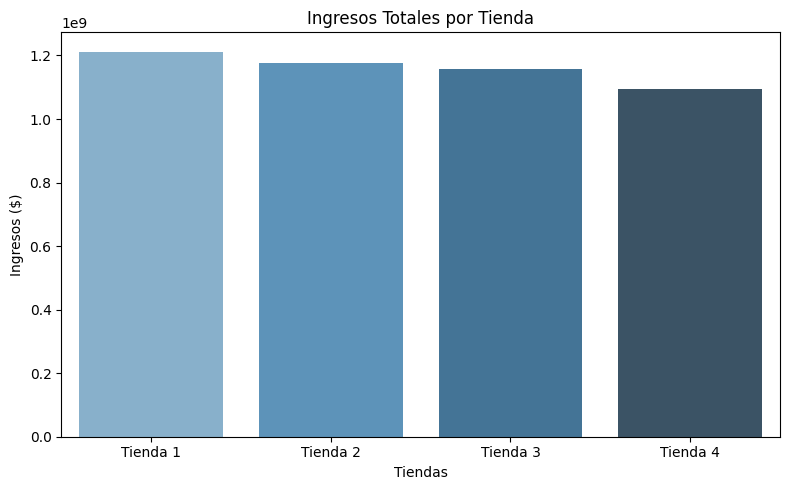

In [12]:
ingresos = [
    (tienda['Precio'] + tienda['Costo de envío']).sum(),
    (tienda2['Precio'] + tienda2['Costo de envío']).sum(),
    (tienda3['Precio'] + tienda3['Costo de envío']).sum(),
    (tienda4['Precio'] + tienda4['Costo de envío']).sum()
]

plt.figure(figsize=(8, 5))
sns.barplot(x=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], y=ingresos, palette="Blues_d")
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos ($)")
plt.xlabel("Tiendas")
plt.tight_layout()
plt.show()




La tienda que obtuvo el mayor ingreso total fue la Tienda 1, lo que demuestra un fuerte volumen de ventas y mayor ticket promedio por cliente.


Distribución de Ventas por Categoría
Las categorías de productos más vendidas fueron:



In [13]:
productos_vendidos = df['Producto'].value_counts()

producto_mas_vendido = productos_vendidos.idxmax()
producto_menos_vendido = productos_vendidos.idxmin()

print(f'Producto más vendido: {producto_mas_vendido}')
print(f'Producto menos vendido: {producto_menos_vendido}')


Producto más vendido: Mesa de noche
Producto menos vendido: Celular ABXY


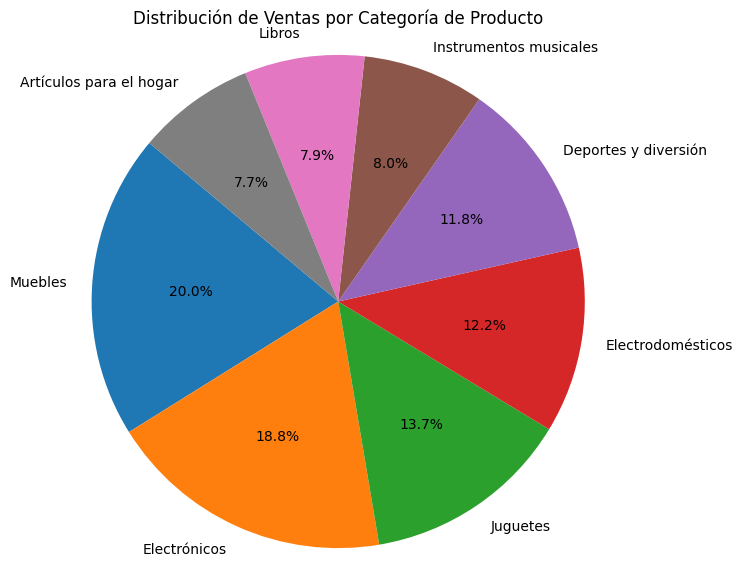

In [14]:
categorias = df['Categoría del Producto'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(categorias, labels=categorias.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Ventas por Categoría de Producto")
plt.axis('equal')  # Círculo perfecto
plt.show()




Esto indica qué tipo de productos tienen más salida. Si el Sr. Juan vende productos alineados con estas categorías populares, tendrá mejores oportunidades de éxito.

Calificación Promedio por Tienda
Las valoraciones de los clientes también juegan un papel clave, ya que reflejan la satisfacción general con la tienda:

In [15]:
for i, t in enumerate(ingresos_tiendas, 1):
    media = t['Calificación'].mean()
    print(f'Calificacion media de tienda{i}: {media:.2f}')


Calificacion media de tienda1: 3.98
Calificacion media de tienda2: 4.04
Calificacion media de tienda3: 4.05
Calificacion media de tienda4: 4.00


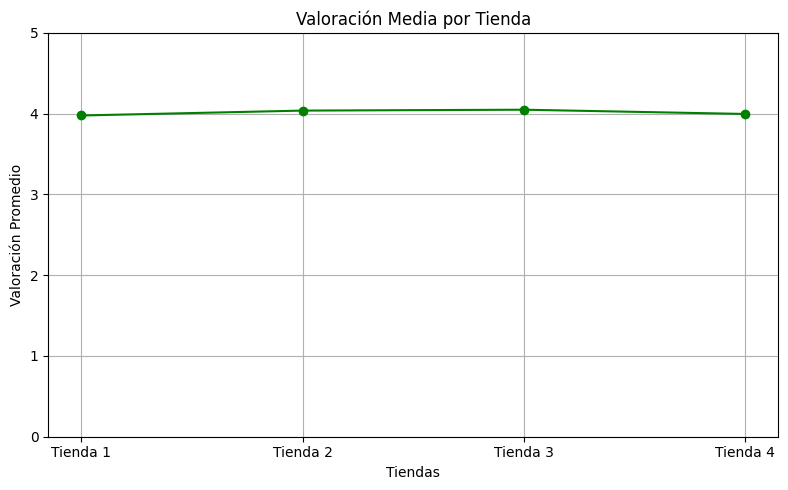

In [ ]:
valoraciones = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

plt.figure(figsize=(8, 5))
plt.plot(["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], valoraciones, marker='o', linestyle='-', color='green')
plt.title("Valoración Media por Tienda")
plt.ylabel("Valoración Promedio")
plt.xlabel("Tiendas")
plt.ylim(0, 5)
plt.grid(True)
plt.tight_layout()
plt.show()




La tienda con mayor calificación promedio fue la Tienda 3, lo que indica un mejor servicio o productos de mayor calidad desde la perspectiva del cliente.

Costo de Envío Promedio
El costo de envío promedio por tienda se calculó como:



In [17]:
for i, t in enumerate(ingresos_tiendas, 1):
    promedio = (t['Precio'] + t['Costo de envío']).mean()
    print(f'Valor promedio por venta en tienda{i}: {promedio:,.2f}')


Valor promedio por venta en tienda1: 513,886.52
Valor promedio por venta en tienda2: 498,443.66
Valor promedio por venta en tienda3: 490,265.45
Valor promedio por venta en tienda4: 463,822.35


Un menor costo de envío puede ser un factor competitivo importante, ya que influye en la decisión de compra del cliente.

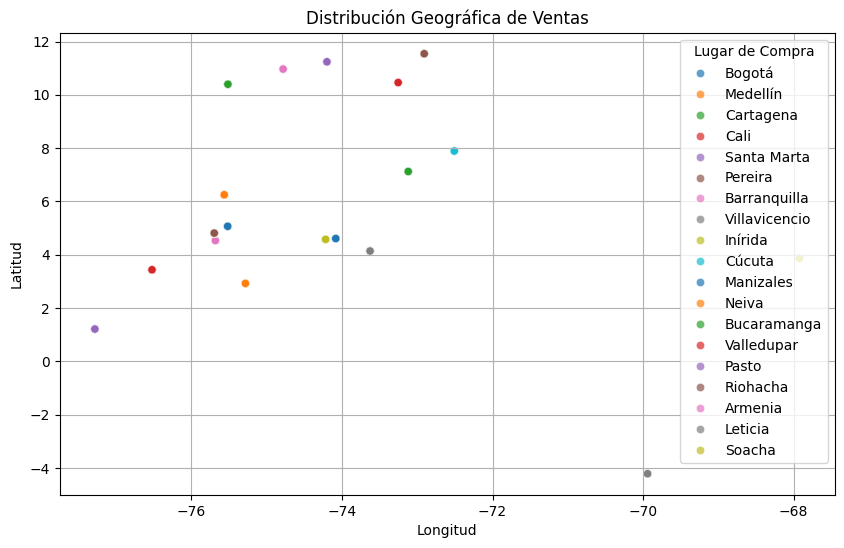

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lon', y='lat', hue='Lugar de Compra', palette='tab10', alpha=0.7)
plt.title('Distribución Geográfica de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


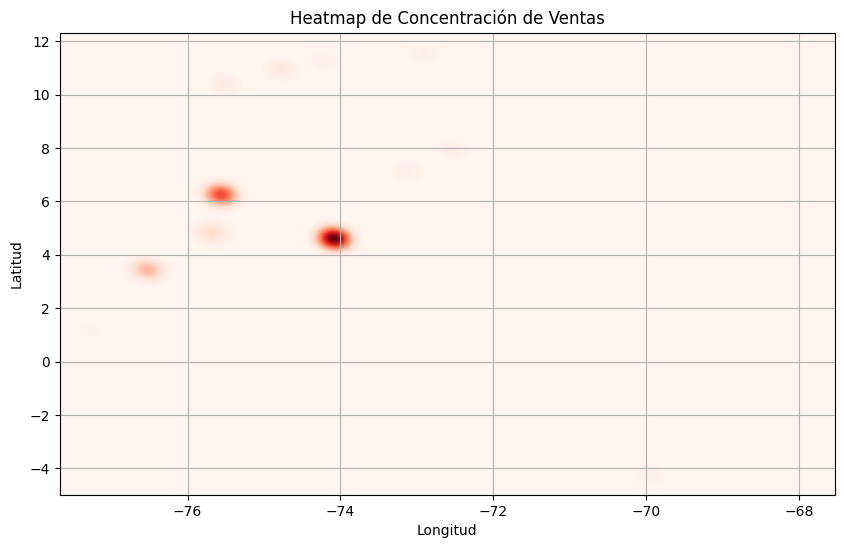

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=df['lon'], y=df['lat'],
    cmap="Reds", fill=True, bw_adjust=0.5, levels=100, thresh=0
)
plt.title('Heatmap de Concentración de Ventas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


In [20]:
import folium
from folium.plugins import HeatMap

# Crear mapa base centrado en Colombia
m = folium.Map(location=[5.0, -74.0], zoom_start=6)

# Preparar los puntos
heat_data = [[row['lat'], row['lon']] for index, row in df.iterrows()]

# Añadir capa de calor
HeatMap(heat_data).add_to(m)

# Mostrar mapa
m


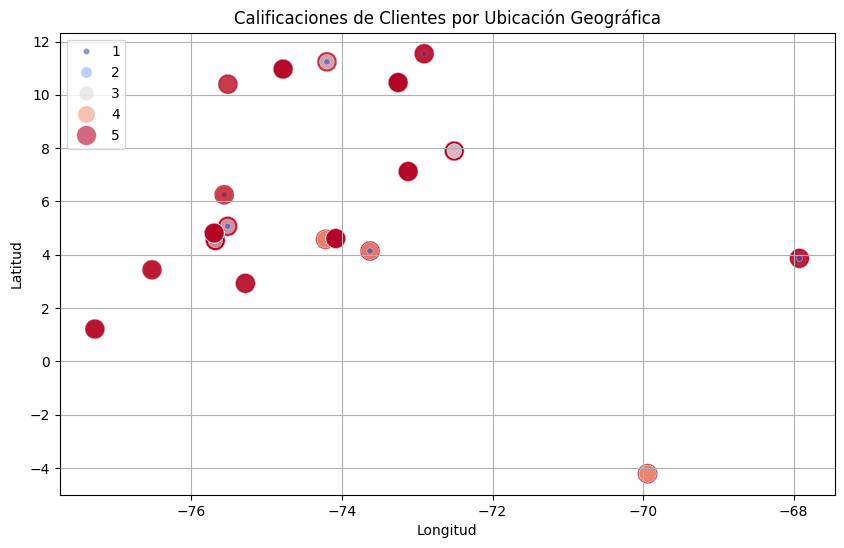

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lon', y='lat', size='Calificación', hue='Calificación', sizes=(20, 200), palette='coolwarm', alpha=0.6)
plt.title('Calificaciones de Clientes por Ubicación Geográfica')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Se detecta una alta concentración de ventas en ciudades como Medellín, Bogotá y Cali, lo que indica que estas son regiones clave.

Las zonas con mejor calificación promedio coinciden con áreas densas de ventas, especialmente en Medellín.
